<a href="https://colab.research.google.com/github/Rishu-khurana/Data-Mining/blob/main/DataMining__2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. loading data :  download “Wine” data

In [ ]:
from sklearn.datasets import load_wine
data= load_wine()
data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
df = pd.DataFrame.from_dict(data["data"])
df.columns = data["feature_names"]
df["target"] = data["target"]

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


2. Follow assignment-1 steps 2 to 5 to perform data processing and write inferences.

In [ ]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
count = np.isinf(df).values.sum()
count

0

Analysis of data :

In [ ]:
#Preparing Data
#Here we have the target variable ‘Type’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment. The iloc function is used to get the features we require. We also use .values function to get an array of the dataset.
#(Note that we transformed the dataset to an array so that we can plot the graphs of the clusters).

wine_X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [ ]:
# Now we will separate the target variable from the original dataset and again convert it to an array by using numpy.
#df['Type']=df.target

wine_Y = df['target']

wine_Y = np.array(wine_Y)

In [ ]:
wine_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


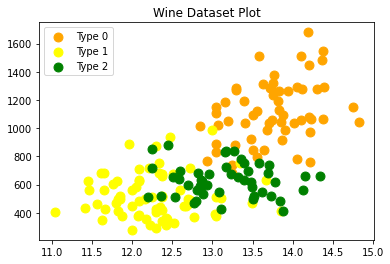

In [ ]:
# Visualise Classes
#In this Wine dataset, we have three classes. We visualise these classes in a 2-D graph.

plt.scatter(wine_X[wine_Y == 0, 0], wine_X[wine_Y == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[wine_Y == 1, 0], wine_X[wine_Y == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[wine_Y == 2, 0], wine_X[wine_Y == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title("Wine Dataset Plot")
plt.legend()

In [ ]:
df=pd.DataFrame(df,columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'])

Pair plot

In [ ]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 8,5
#sns.pairplot(df, kind='scatter', hue="target")

Finding correlation

Correlation is used to quantify the association between two continuous variables (e.g., between an independent and a dependent variable or between two independent variables).

Here in this case , it is visualised that if we have correlation coefficient closer to value 1, it means there is a positive relationship between variable X and Y. A positive relationship indicates an increase in one variable associated with an increase in the other.

Visualisation is shown below:

In [ ]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


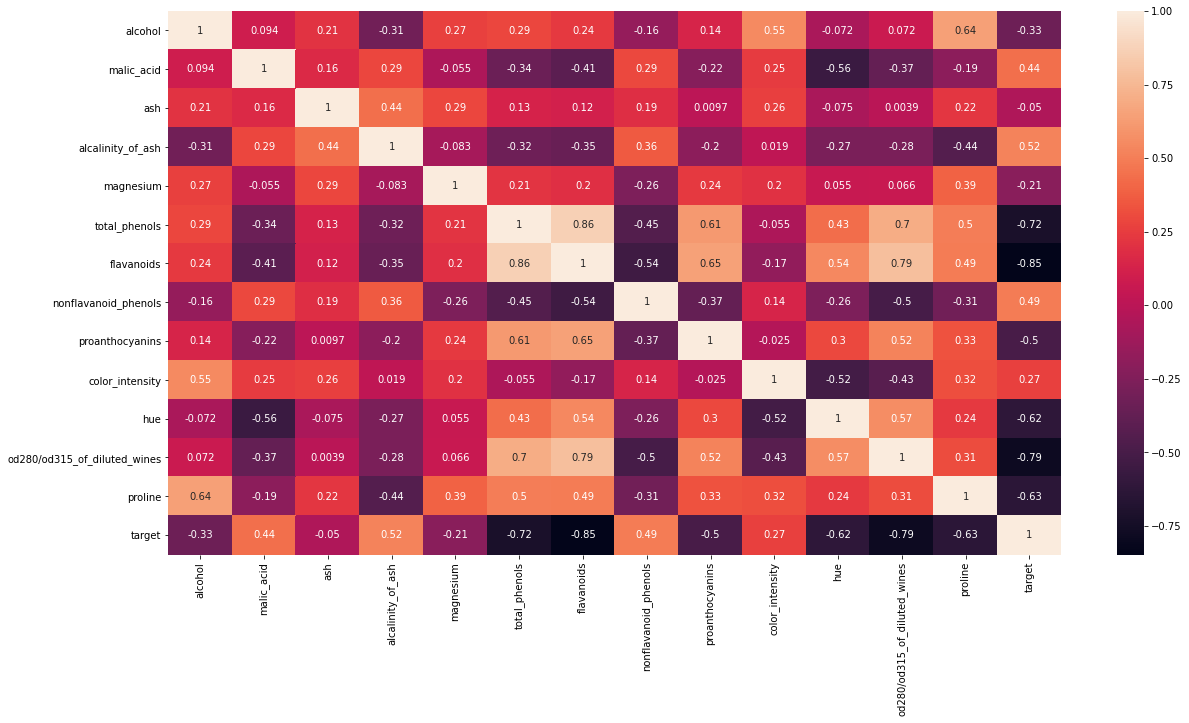

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

creating box plot

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

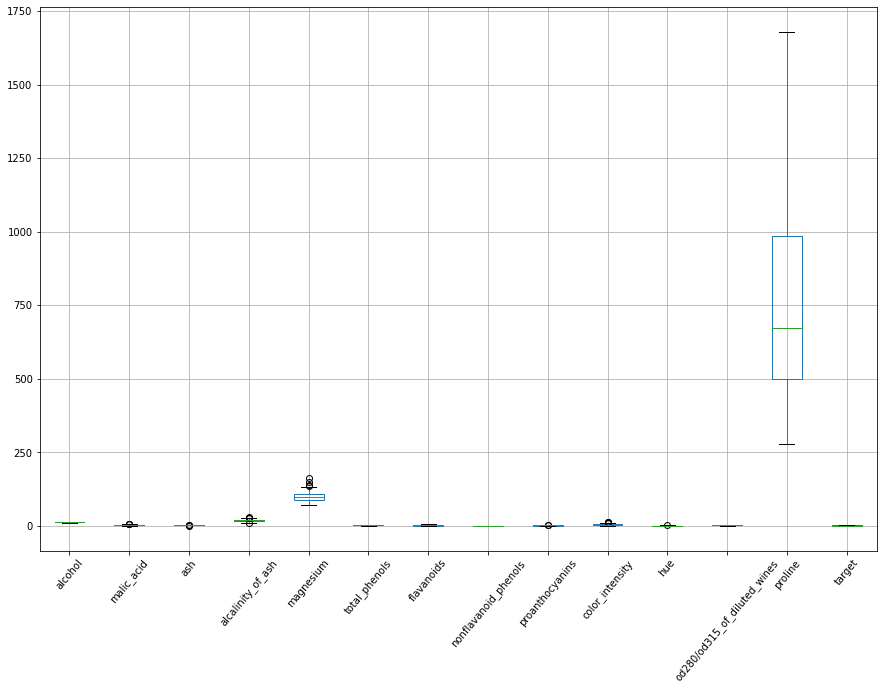

In [ ]:
df.boxplot(figsize=(15,10))
plt.xticks(rotation=50)

Outlier Detection by IQR method.

In [ ]:
a=df.quantile([.25] , axis = 0)
b=df.quantile([.75] , axis = 0)

In [ ]:
IQR=b.mean()-a.mean()
IQR

alcohol                           1.3150
malic_acid                        1.4800
ash                               0.3475
alcalinity_of_ash                 4.3000
magnesium                        19.0000
total_phenols                     1.0575
flavanoids                        1.6700
nonflavanoid_phenols              0.1675
proanthocyanins                   0.7000
color_intensity                   2.9800
hue                               0.3375
od280/od315_of_diluted_wines      1.2325
proline                         484.5000
target                            2.0000
dtype: float64

In [ ]:
lower_limit=a.mean()-1.5*IQR
lower_limit

alcohol                          10.39000
malic_acid                       -0.61750
ash                               1.68875
alcalinity_of_ash                10.75000
magnesium                        59.50000
total_phenols                     0.15625
flavanoids                       -1.30000
nonflavanoid_phenols              0.01875
proanthocyanins                   0.20000
color_intensity                  -1.25000
hue                               0.27625
od280/od315_of_diluted_wines      0.08875
proline                        -226.25000
target                           -3.00000
dtype: float64

In [ ]:
upper_limit=b.mean()+1.5*IQR
upper_limit

alcohol                           15.65000
malic_acid                         5.30250
ash                                3.07875
alcalinity_of_ash                 27.95000
magnesium                        135.50000
total_phenols                      4.38625
flavanoids                         5.38000
nonflavanoid_phenols               0.68875
proanthocyanins                    3.00000
color_intensity                   10.67000
hue                                1.62625
od280/od315_of_diluted_wines       5.01875
proline                         1711.75000
target                             5.00000
dtype: float64

In [ ]:
df_new= df[(df<upper_limit) & (df>lower_limit)]
df_new

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,NaN,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Checking for null values

In [ ]:
df_new.isnull().sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Now we have removed the outliers , after removing the outliers the values have been replaced by null value , to make the data more efficient we will replace the null values by mean/median as per requirement .

In [ ]:
 k=df_new.fillna(df_new.median())
 k

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.83,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
k.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Box Plot after removal of outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

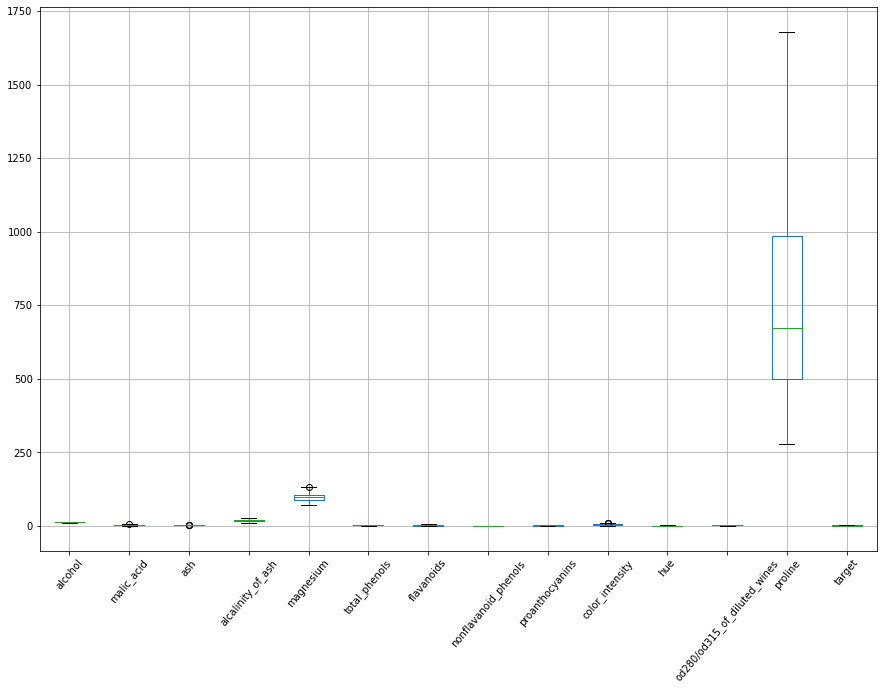

In [ ]:
k.boxplot(figsize=(15,10))
plt.xticks(rotation=50)



Performing Normalization

Though the steps performed above involves detection, removal of outlier and then filling up the null values with mean/median ,data would be more feasible if the dataset is within the values of 0-1, i.e Normalisation

In [ ]:
normalized_df=(k-k.min())/(k.max()-k.min())
normalized_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,0.705263,0.244944,0.614754,0.588608,0.390625,0.241379,0.056962,0.735849,0.254902,0.694805,0.164948,0.172161,0.329529,1.0
174,0.623684,0.712360,0.639344,0.746835,0.500000,0.282759,0.086498,0.566038,0.392157,0.651515,0.226804,0.106227,0.336662,1.0
175,0.589474,0.795506,0.459016,0.556962,0.781250,0.210345,0.073840,0.566038,0.368627,0.965368,0.113402,0.106227,0.397290,1.0
176,0.563158,0.415730,0.549180,0.556962,0.781250,0.231034,0.071730,0.754717,0.411765,0.867965,0.123711,0.128205,0.400856,1.0
177,0.815789,0.755056,0.852459,0.841772,0.406250,0.368966,0.088608,0.811321,0.368627,0.857143,0.134021,0.120879,0.201141,1.0


3. Perform at least five clustering methods with varying cluster sizes. Find correct cluster numbers
for each method and show with line plot; how you finalized this cluster number

Implementing Clustering


K MEANS CLUSTERING

K-means converges in a finite number of iterations. Since the algorithm iterates a function whose domain is a finite set, the iteration must eventually converge.

It’s difficult to predict the optimal number of clusters or the value of k. To find the number of clusters, we need to run the k-means clustering algorithm for a range of k values and compare the results.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(normalized_df)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 0 0 3 0 0 0 3 0 3 0 0 2
 0 3 0 3 0 0 0 0 3 3 0 0 3 3 3 0 3 3 3 0 0 0 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0
 0 3 3 0 0 0 0 3 0 0 0 3 0 0 0 0 3 0 3 1 1 1 1 4 4 4 4 4 4 4 4 4 4 1 4 4 4
 4 1 1 1 1 4 4 4 4 4 1 4 4 4 4 4 4 4 1 4 1 1 4 4 4 4 1 1 1 4]


array([[0.33520468, 0.23360799, 0.37704918, 0.53720113, 0.32204861,
        0.5164751 , 0.4273324 , 0.33962264, 0.52461874, 0.19540645,
        0.57640321, 0.63833944, 0.16291013, 0.5       ],
       [0.56101974, 0.52205056, 0.64805328, 0.69738924, 0.63867188,
        0.23534483, 0.15625   , 0.37382075, 0.3495098 , 0.61410985,
        0.18556701, 0.10187729, 0.26043153, 1.        ],
       [0.71109649, 0.28426966, 0.60956284, 0.37199367, 0.56549479,
        0.64408046, 0.55713783, 0.29937107, 0.58444444, 0.45584416,
        0.60429553, 0.69358974, 0.59595816, 0.00833333],
       [0.30926316, 0.29662921, 0.5642623 , 0.58658228, 0.36875   ,
        0.29075862, 0.25232068, 0.63471698, 0.33129412, 0.19458874,
        0.58457732, 0.39472527, 0.17580599, 0.5       ],
       [0.5578125 , 0.56060393, 0.58222336, 0.62124209, 0.36767578,
        0.24375   , 0.061577  , 0.71167453, 0.26262255, 0.59172078,
        0.22068299, 0.17628205, 0.24627764, 1.        ]])

There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset.

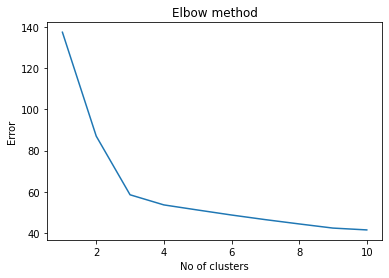

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(normalized_df)
    kmeans.fit(normalized_df)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The output graph of the Elbow method is shown.The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(normalized_df)
print(y_kmeans3)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
kmeans3.cluster_centers_

array([[0.55832438, 0.55088283, 0.6022081 , 0.64802377, 0.45344388,
        0.24074595, 0.09661586, 0.60531382, 0.29531813, 0.5947301 ,
        0.21228698, 0.15392091, 0.24932312, 0.98979592],
       [0.71109649, 0.28426966, 0.60956284, 0.37199367, 0.56549479,
        0.64408046, 0.55713783, 0.29937107, 0.58444444, 0.45584416,
        0.60429553, 0.69358974, 0.59595816, 0.00833333],
       [0.32295957, 0.24966618, 0.44297933, 0.5525133 , 0.34024004,
        0.43883058, 0.36629365, 0.43833744, 0.4552998 , 0.19242111,
        0.58233976, 0.55539629, 0.16749364, 0.5       ]])

In [ ]:
x = normalized_df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values

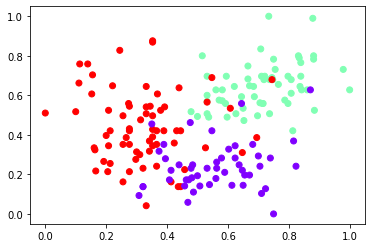

In [ ]:
plt.scatter(x[:,0],x[:,5],c=y_kmeans3,cmap="rainbow")



The computational cost of the k-means algorithm is O(k*n*d), where n is the number of data points, k the number of clusters, and d the number of attributes.
Compared to other clustering methods, the k-means clustering technique is fast and efficient in terms of its computational cost.

Gaussian Mixture Models(GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
gauss = GaussianMixture(n_components = 3, random_state=100)
res_gauss = gauss.fit(df)

In [ ]:
labelpredgauss = gauss.predict(df)

Text(0.5, 1.0, 'Gaussian')

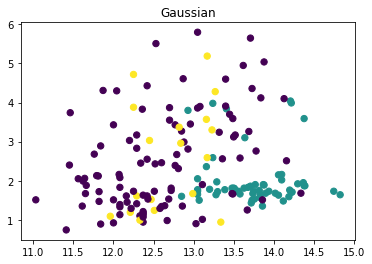

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=labelpredgauss, s=40, cmap='viridis');
#plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labelpredgauss, cmap='Paired')
plt.title("Gaussian")

K-Means is a simple and fast clustering method, but it may not truly capture heterogeneity inherent in Cloud workloads.

Gaussian Mixture Models can discover complex patterns and group them into cohesive, homogeneous components that are close representatives of real patterns within the data set.

Hierarchical clustering

Using the dendrogram to find the optimal numbers of clusters.

In [ ]:
X = df.iloc[:, [3,4]].values

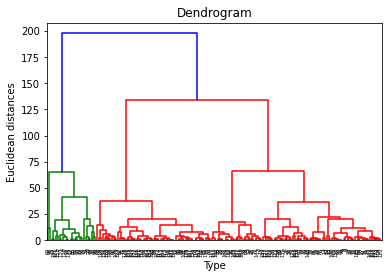

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Type')
plt.ylabel('Euclidean distances')
plt.show()

Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants.

For optimal number of clusters, We look for the largest distance that we can vertically without crossing any horizontal line, Cluster number will be 3 for this dataset.

In [ ]:


from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y=cluster.fit_predict(normalized_df)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

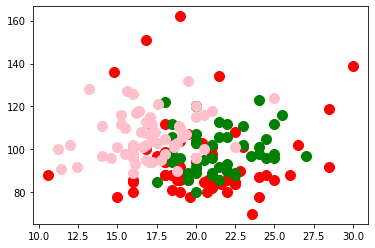

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='pink', label ='Cluster 3')


## Affinity Propagation

In [ ]:
df_a=k.iloc[:,:-2]
X=k.values

In [ ]:
df_a.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93


In [ ]:
from sklearn.cluster import AffinityPropagation
afprop = AffinityPropagation(max_iter=250)
afprop.fit(X)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
n_clusters_

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

scaler = StandardScaler()
X_st = scaler.fit_transform(X)
X_st

array([[ 1.51861254, -0.54693673,  0.27397068, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.47880204, -0.90162087, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.08574253,  1.24687403, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.95457975, -0.4151692 , ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.30961366,  0.03074484, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.77937626,  1.5306375 , ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [ ]:
ap= AffinityPropagation(damping=0.5, max_iter=500, affinity="euclidean")

In [ ]:
ap

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=500, preference=None, verbose=False)

In [ ]:
clusters = pd.DataFrame(ap.fit_predict(X_st))
data["Cluster"] = clusters
cluster_centers_indices =ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)

In [ ]:
cluster_centers_indices

array([  5,  29,  34,  56,  60,  88,  97, 120, 125, 131, 138, 148, 162])

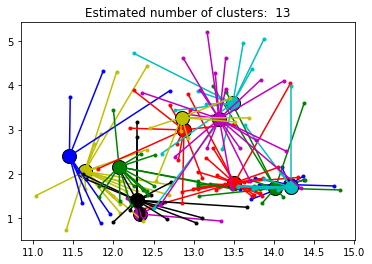

In [ ]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)

    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]],
                 [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

Fuzzy C-Means

In [ ]:
pip install fuzzy-c-means

In [ ]:
from fcmeans import FCM


In [ ]:
fcm = FCM(n_clusters=3)
fcm.fit(X)


In [ ]:
fcm_labels

NameError: ignored

In [ ]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))

axes[0].scatter(X[:,0], X[:,1], alpha=.6)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.6)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=600, c='b')
axes[0].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=600, c='b')

plt.show()

#Dimension Reduction

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.

In [ ]:
df_a.head()

In [ ]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2)
principalcomponents= pca_data.fit_transform(df_a)

In [ ]:
principal_data = pd.DataFrame(data = principalcomponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principal_data

In [ ]:
print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

In [ ]:
principal_data['target']=df['target']

In [ ]:
principal_data.tail()

In [ ]:
principal_data['target'] =principal_data['target'].astype(str)

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = ['0', '1', '2']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principal_data['target'] == target
    plt.scatter(principal_data.loc[indicesToKeep, 'principal component 1'], principal_data.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.style.use('seaborn')
plt.legend(targets,prop={'size': 15})
plt.show()


In [ ]:
#appplying clustering again

In [ ]:
principal_data.head()

In [ ]:
principal_data.iloc[:,:-1]

In [ ]:
Error1 =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(principal_data.iloc[:,:-1])
    kmeans.fit(principal_data.iloc[:,:-1])
    Error1.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , Error1 , 'o')
plt.plot(np.arange(1 , 11) , Error1 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(principal_data.iloc[:,:-1])
y_kmeans3

In [ ]:
kmeans3.cluster_centers_

In [ ]:
principal_data.iloc[:,:-1].values

In [ ]:
X = principal_data.iloc[:,:-1].values
#plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (10 , 5) )
# Visualising the clusters
plt.scatter(X[y_kmeans3==0, 0], X[y_kmeans3==0, 1], s=100, c='pink', label ='Cluster 1')
plt.scatter(X[y_kmeans3==1, 0], X[y_kmeans3==1, 1], s=100, c='yellow', label ='Cluster 2')
plt.scatter(X[y_kmeans3==2, 0], X[y_kmeans3==2, 1], s=100, c='green', label ='Cluster 3')

plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],s=200,c='black',label='centroid')
plt.show()

In [ ]:
clt = AffinityPropagation(damping=0.8, max_iter=200, affinity="euclidean")
clusters = pd.DataFrame(clt.fit_predict(principal_data.iloc[:,:-2]))
data["Cluster"] = clusters
cluster_centers_indices =clt.cluster_centers_indices_
labels = clt.labels_
n_clusters_ = len(cluster_centers_indices)
cluster_centers_indices

In [ ]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)

    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]],
                 [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.figure(figsize=(10,10))
plt.style.use('seaborn-talk')
plt.show()


In [ ]:
#herirarchical clustering

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Type')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
unique_colors= set(dend['color_list'])
print(unique_colors)

In [ ]:
optimal_num_clusters= len(unique_colors) -1
print(optimal_num_clusters)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(principal_data.iloc[:,:-2])

In [ ]:
principal_data.iloc[:,:-2]

In [ ]:
plt.figure(figsize=(10, 7))
plt.style.use('seaborn')
plt.scatter(principal_data['principal component 1'], principal_data['principal component 2'], c=cluster.labels_)
plt.title('Clusters (Hierarchical Clustering Model)')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
gauss = GaussianMixture(n_components = 3, random_state=100)
res_gauss = gauss.fit(principal_data)

In [ ]:
labelpredgauss = gauss.predict(principal_data)

In [ ]:
plt.scatter(principal_data.iloc[:,0],principal_data.iloc[:,1], c=labelpredgauss, s=40, cmap='viridis');
#plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labelpredgauss, cmap='Paired')
plt.title("Gaussian")

Dimensionality reduction reduces the overall number of features, it can reduce the computational demands associated with training a model but also helps combat overfitting by keeping the features that will be fed to the model fairly simple.